In [1]:
# bubblesort
# obtained from running `make bubblesort-benchmark` in `src/` 10 times
orig = [3319, 3282, 3297, 3263, 3290, 3295, 3324, 3264, 3327, 3314]
instrumented = [3873, 3879, 3798, 3801, 3756, 3806, 3813, 3775, 3736, 3785]
print(f"len: {len(orig)} , avg: {sum(orig) / len(orig)}")
print(f"len: {len(instrumented)} , avg: {sum(instrumented) / len(instrumented)}")


len: 10 , avg: 3297.5
len: 10 , avg: 3802.2


In [2]:
# sequential program benchmark
# obtained by running `make seqmem-benchmark`

# sequential mem write

orig:
 Performance counter stats for 'wasmtime --invoke foo example-original.wasm -- 2147483643 4' (10 runs):

          1,402.44 msec task-clock                #    0.999 CPUs utilized            ( +-  0.39% )
                12      context-switches          #    0.009 K/sec                    ( +- 27.94% )
                 0      cpu-migrations            #    0.000 K/sec                    ( +- 66.67% )
           428,427      page-faults               #    0.305 M/sec                    ( +-  0.00% )
     4,393,717,463      cycles                    #    3.133 GHz                      ( +-  0.06% )  (49.86%)
     8,638,222,132      instructions              #    1.97  insn per cycle           ( +-  0.06% )  (62.41%)
     1,912,871,132      branches                  # 1363.955 M/sec                    ( +-  0.09% )  (62.43%)
           850,316      branch-misses             #    0.04% of all branches          ( +-  0.58% )  (62.52%)
       955,631,971      L1-dcache-loads           #  681.405 M/sec                    ( +-  0.10% )  (62.67%)
        54,184,838      L1-dcache-load-misses     #    5.67% of all L1-dcache accesses  ( +-  0.24% )  (62.68%)
         1,100,213      LLC-loads                 #    0.784 M/sec                    ( +-  1.51% )  (50.01%)
           691,813      LLC-load-misses           #   62.88% of all LL-cache accesses  ( +-  2.19% )  (49.84%)

           1.40340 +- 0.00526 seconds time elapsed  ( +-  0.37% )

# sequential mem write

dyn:
 Performance counter stats for 'wasmtime --invoke foo example-with-checks.wasm -- 2147483643 4' (10 runs):

          2,468.03 msec task-clock                #    0.999 CPUs utilized            ( +-  0.35% )
                24      context-switches          #    0.010 K/sec                    ( +- 29.65% )
                 1      cpu-migrations            #    0.000 K/sec                    ( +- 44.44% )
           950,926      page-faults               #    0.385 M/sec                    ( +-  0.19% )
     7,899,234,286      cycles                    #    3.201 GHz                      ( +-  0.24% )  (49.80%)
    12,375,850,892      instructions              #    1.57  insn per cycle           ( +-  0.16% )  (62.42%)
     2,303,817,189      branches                  #  933.465 M/sec                    ( +-  0.15% )  (62.53%)
         1,855,475      branch-misses             #    0.08% of all branches          ( +-  0.91% )  (62.62%)
     2,033,643,712      L1-dcache-loads           #  823.995 M/sec                    ( +-  0.15% )  (62.67%)
       103,970,763      L1-dcache-load-misses     #    5.11% of all L1-dcache accesses  ( +-  0.50% )  (62.67%)
         2,802,134      LLC-loads                 #    1.135 M/sec                    ( +-  1.76% )  (49.89%)
         1,544,853      LLC-load-misses           #   55.13% of all LL-cache accesses  ( +-  2.18% )  (49.82%)

           2.47008 +- 0.00880 seconds time elapsed  ( +-  0.36% )


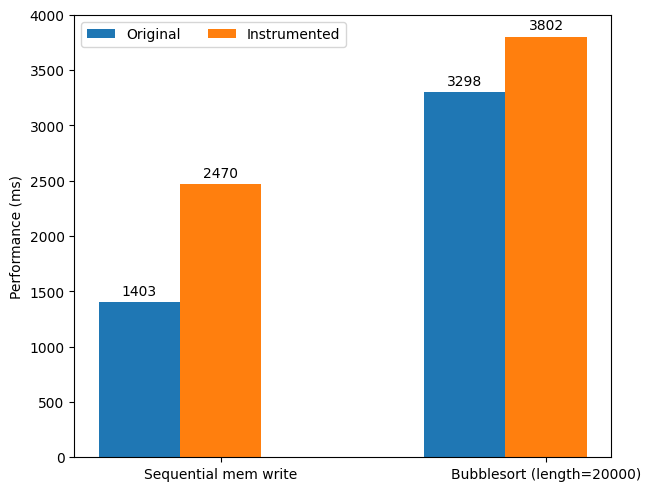

In [3]:
import matplotlib.pyplot as plt
import numpy as np

cats = ("Sequential mem write", "Bubblesort (length=20000)")
means = {
    'Original':     (1403, 3298),
    'Instrumented': (2470, 3802),
}

x = np.arange(len(cats))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance (ms)')
# ax.set_title('Runtime penalty dynamic checks')
ax.set_xticks(x + width, cats)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 4000)

plt.show()